In [16]:
df = pd.read_csv("/project/MERGED.csv")
df

,Brief Name,Client,Shortlisted Agency,Agency Skills,Agency Industries,Service Description,Agency Description,Agency services,Other Services,Vision,...,Lead_George Patten,Lead_Gideon Hyde,Lead_Hannah Fraser,Lead_Kate Walker,Lead_Paul Bowman,Lead_Peter Sayburn,Lead_Phil Kohler,Lead_Robin Scarborough,Sub Brief Taxonomy,Main Brief Taxonomy
0,Awards applications x5,AXA,Boost Awards,"(Copywriting), (PR)",(Professional_Services),We are the world’s first and largest award ent...,We are the world’s first and largest award ent...,(Public_Relations),(Awards_consultancy),NaN,...,0,0,0,0,0,0,1,0,"(PR), (Corporate_Communication)",(Media_Public Relations & Events)
1,Awards applications x5,AXA,Reed Words,"(Brand_Strategy), (Copywriting), (Corporate_Co...","(Administrative_and_Support_Services), (Alcoho...",Verbal branding and copy writing,We make brands and business stronger through l...,"(Marketing_Planning), (Social_&_Content)","(Copywriting), (Naming), (Tone_of_Voice), (Bra...",Making Brands and Businesses Stronger Through ...,...,0,0,0,0,0,0,1,0,"(PR), (Corporate_Communication)",(Media_Public Relations & Events)
2,Countrywide broker video,AXA,Viewpoint Studios,"(Brand_Design), (Customer_Experience_Design), ...","(Alcoholic_Beverages), (Automotive), (Beauty),...",Advertising and commercial photography and film,Inspired photography and film,"(Creative_&_Production), (Social_&_Content)",(Advertising_and_commercial_photography_and_film),NaN,...,0,0,0,0,0,1,0,0,(Video_Production),"(Production Services), (Advertising_Brand & Cr..."
3,Countrywide broker video,AXA,Shoreditch Design Studio,"(Brand_Design), (UX_&_UI_Design), (Mobile_App_...",(B2B),The creative agency for your next big thing,The creative agency for your next big thing,"(Strategic_Design), (UX/UI_Design)","(Product_Design), (Print_Design), (Animation),...",We create high quality digital design for busi...,...,0,0,0,0,0,1,0,0,(Video_Production),"(Production Services), (Advertising_Brand & Cr..."
4,Prop Dev (EV and CC Insurance),AXA,Blue Feathers,"(Business_Strategy), (CRM_Strategy), (Customer...","(Alcoholic_Beverages), (Beauty), (Education), ...",We work with ambitious marketing leaders and t...,We work with ambitious marketing leaders and t...,"(Brand_Strategy), (Proposition_Design), (CRM_&...",NaN,Specialists in brand strategy and proposition ...,...,0,0,0,0,0,0,1,0,(Proposition_Design),(Experience & Design)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,Social Media Veezu,Veezu,GH05T Ltd.,"(Data_Analytics), (Advertising), (Brand_Strate...","(Alcoholic_Beverages), (Beauty), (Entertainmen...",We are a social media agency operating in the ...,We are a social media agency operating in the ...,"(Brand_Strategy), (Creative_&_Production), (Ma...",NaN,NaN,...,0,0,0,0,1,0,0,0,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events)
247,Social Media Veezu,Veezu,Nonsensical,"(Advertising), (Social_Media), (Creative_Produ...","(Beauty), (Education), (Entertainment), (Fashi...",We do TikTok so you don't have to!,We do TikTok so you don't have to!,"(Creative_&_Production), (Social_&_Content), (...",(TikTok),NaN,...,0,0,0,0,1,0,0,0,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events)
248,Social Media Veezu,Veezu,Spin Brands,"(Digital_Strategy), (Growth_&_Innovation_Strat...","(Administrative_and_Support_Services), (Alcoho...",Voted UK's #1 Social Agency,Voted UK's #1 Social Agency,"(Creative_&_Production), (Marketing_Planning),...","(Social_Media_Management), (Advertising_+_Cont...",NaN,...,0,0,0,0,1,0,0,0,(Social_Media_and_Influencer_Marketing),(Media_Public Relations & Events)
249,SME engagement,Wave,NMD+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,(Proposition_Design),(Experience & Design)


# Heatmap of Agency Locations for Different Brief Regions

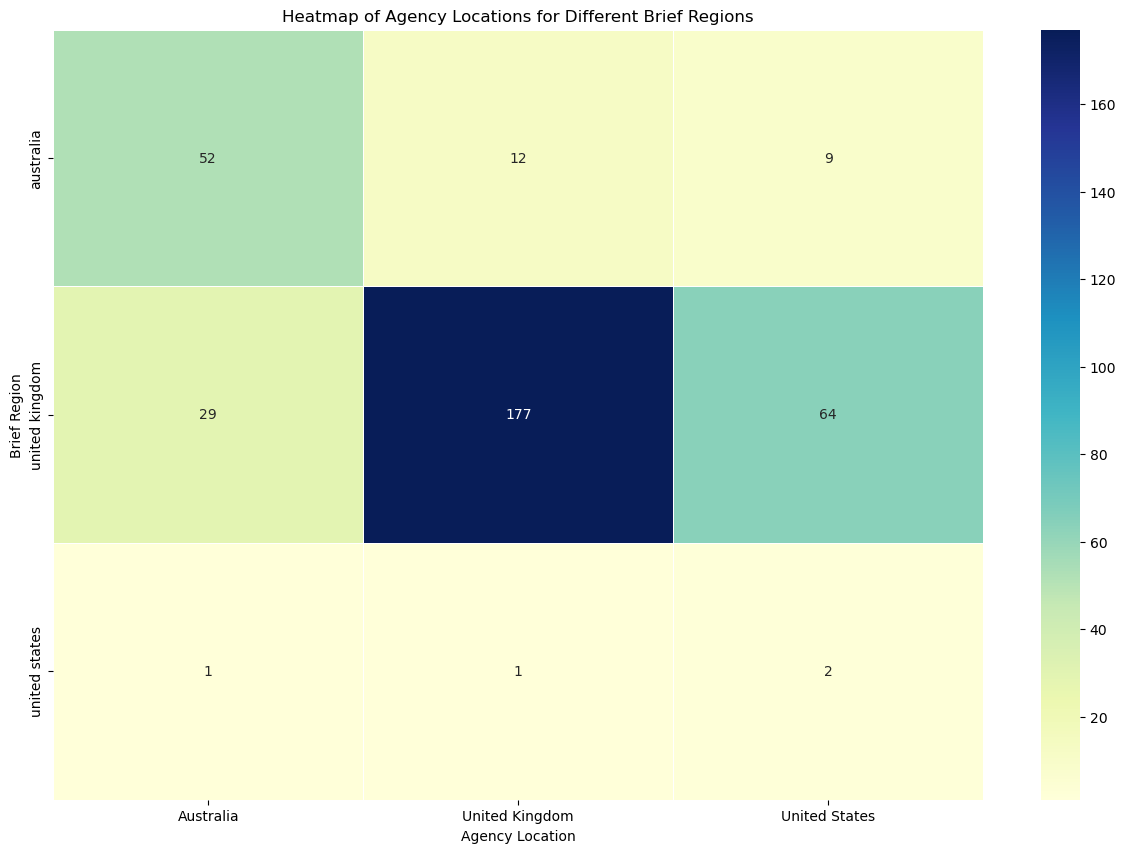

In [7]:
# Create a pivot table with 'Brief Region' as rows and exploded 'Agency Locations' as columns. 
# The values will represent the count of occurrences.
pivot_data = df.assign(Agency_Location=df['Agency Locations'].str.split(',')).explode('Agency_Location')
pivot_data['Agency_Location'] = pivot_data['Agency_Location'].str.strip()  # Removing trailing white spaces
pivot_data = pivot_data.groupby(['Brief Region', 'Agency_Location']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Agency Locations for Different Brief Regions')
plt.ylabel('Brief Region')
plt.xlabel('Agency Location')
plt.show()


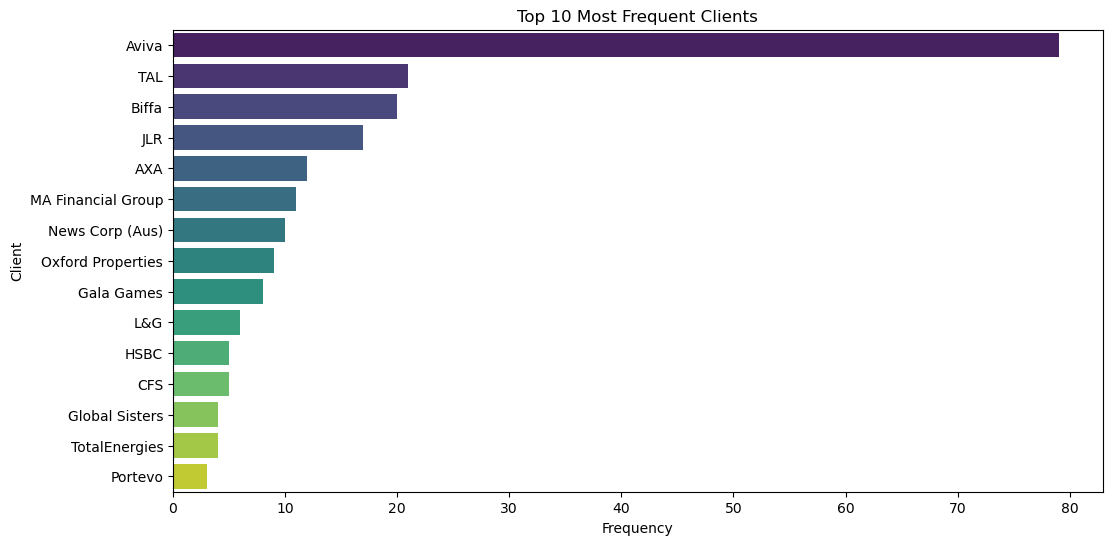

In [8]:
# Top 10 Most Frequent Clients
top_clients = df['Client'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_clients.values, y=top_clients.index, palette='viridis')
plt.title('Top 10 Most Frequent Clients')
plt.xlabel('Frequency')
plt.ylabel('Client')
plt.show()


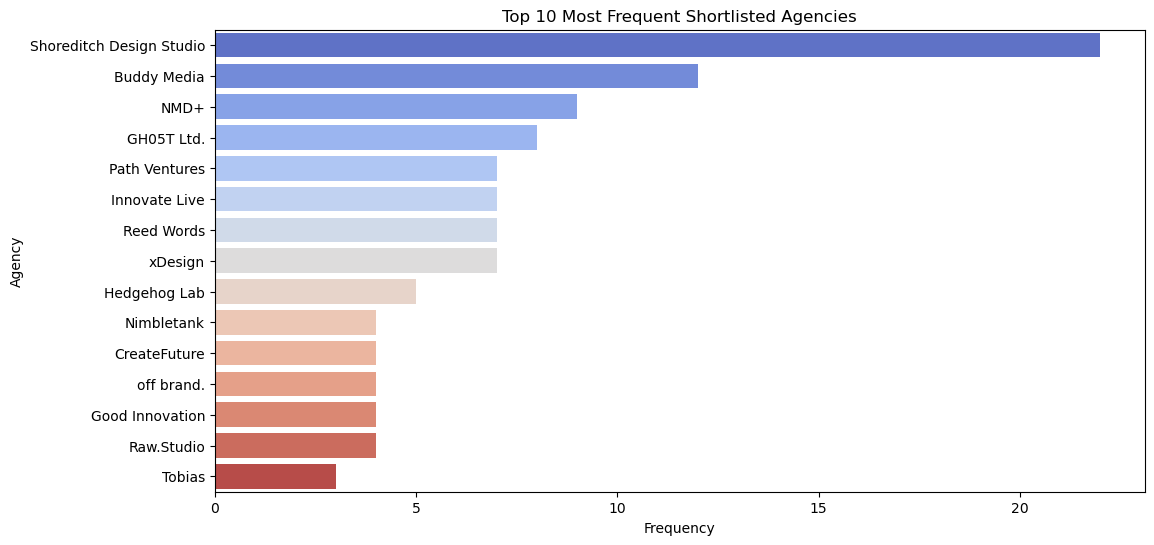

In [9]:
# Top 10 Most Frequent Shortlisted Agencies
top_agencies = df['Shortlisted Agency'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_agencies.values, y=top_agencies.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Shortlisted Agencies')
plt.xlabel('Frequency')
plt.ylabel('Agency')
plt.show()

# Distribution of Briefs Across Regions

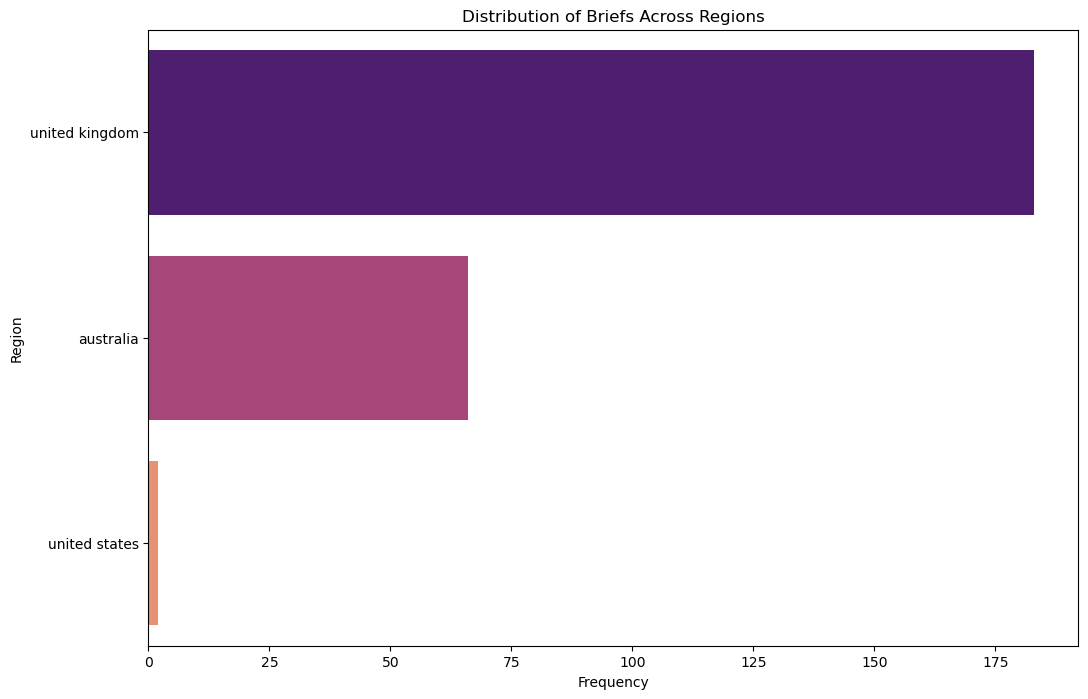

In [9]:
# Getting the count of briefs across regions
brief_regions = df['Brief Region'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=brief_regions.values, y=brief_regions.index, palette='magma')
plt.title('Distribution of Briefs Across Regions')
plt.xlabel('Frequency')
plt.ylabel('Region')
plt.show()


# Distribution of Briefs Based on Status

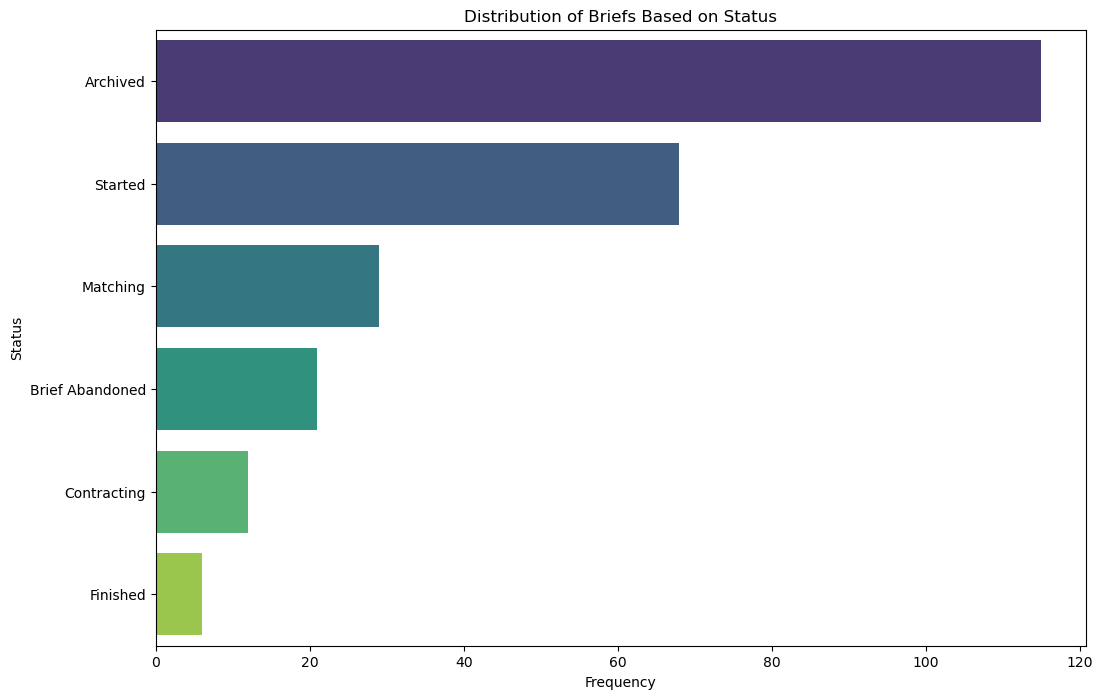

In [19]:
# Getting the count of briefs based on status
brief_status = df['Status'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=brief_status.values, y=brief_status.index, palette='viridis')
plt.title('Distribution of Briefs Based on Status')
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.show()

#  Distribution of Briefs Based on Main Brief Taxonomy

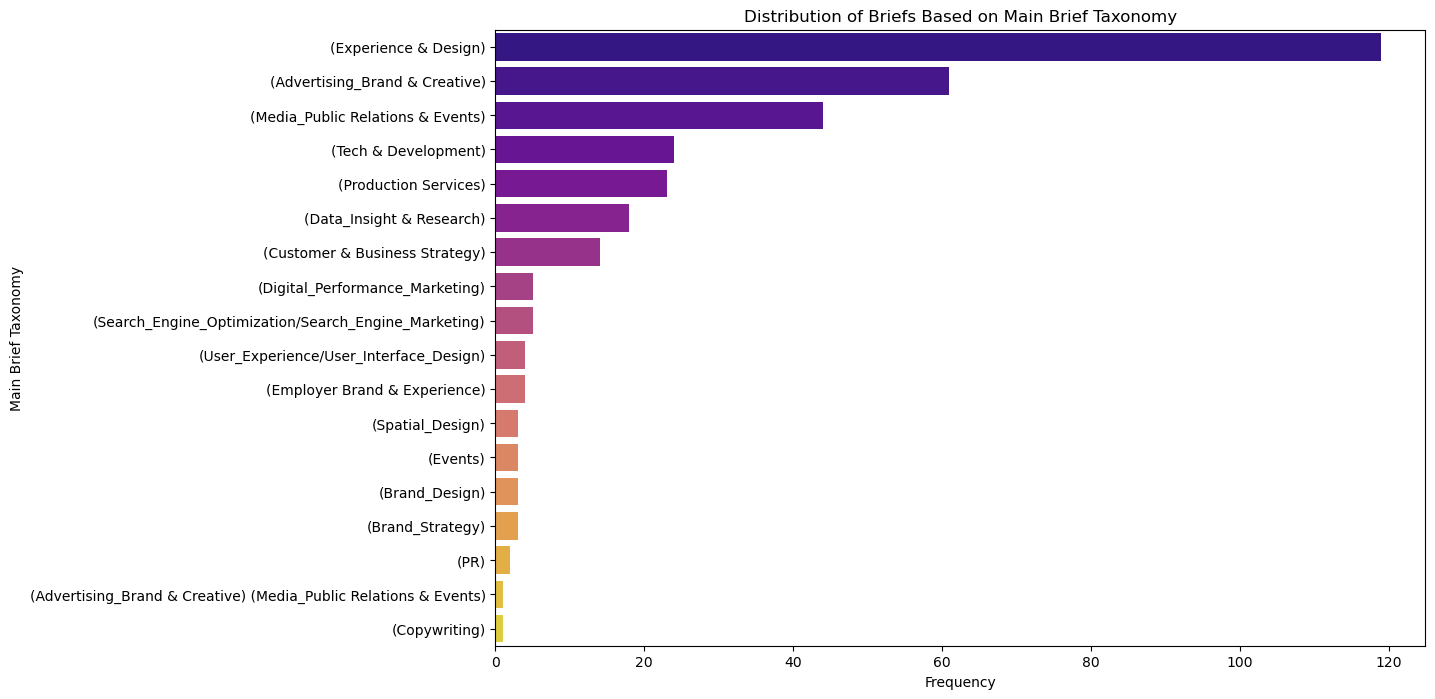

In [13]:
# Split 'Main Brief Taxonomy' by commas and explode to get separate rows for each taxonomy
taxonomy_exploded = df['Main Brief Taxonomy'].str.split(',').explode().str.strip()

# Getting the count of each taxonomy
brief_taxonomy = taxonomy_exploded.value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=brief_taxonomy.values, y=brief_taxonomy.index, palette='plasma')
plt.title('Distribution of Briefs Based on Main Brief Taxonomy')
plt.xlabel('Frequency')
plt.ylabel('Main Brief Taxonomy')
plt.show()


# Distribution of Agencies Based on Their Location

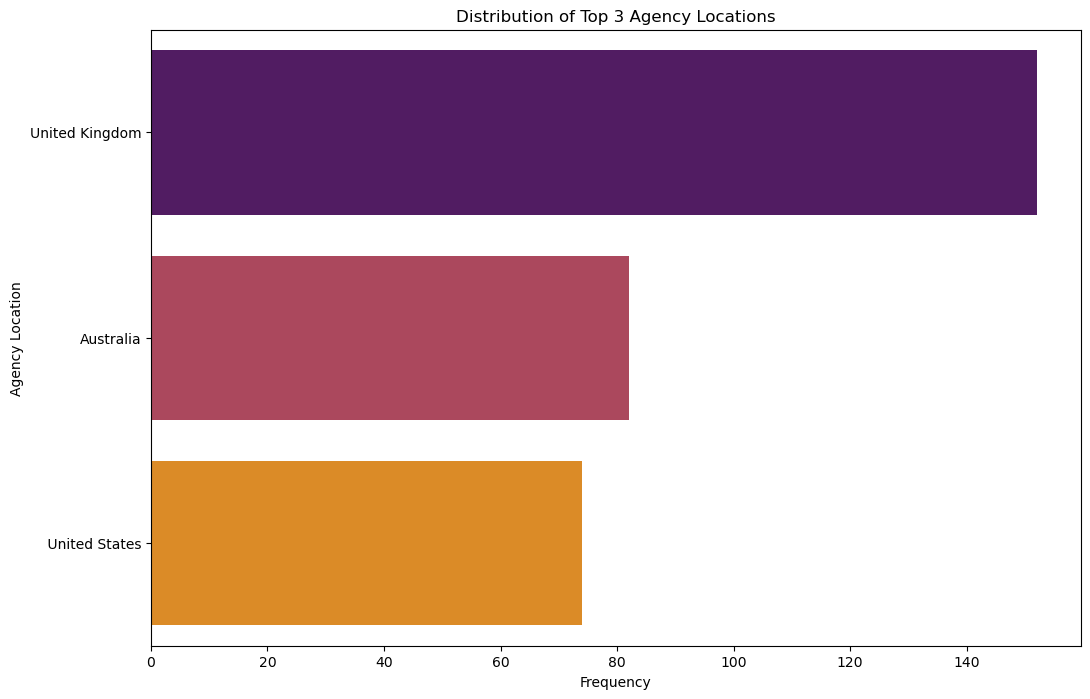

In [23]:
# Remove trailing white spaces
df['Agency Locations'] = df['Agency Locations'].str.strip()

# Split locations by commas and explode to get separate rows for each location
locations_exploded = df['Agency Locations'].str.split(',').explode()

# Getting the count of top three agency locations
top_three_locations = locations_exploded.value_counts().head(3)

# Plotting the horizontal bar chart for top three locations
plt.figure(figsize=(12, 8))
sns.barplot(x=top_three_locations.values, y=top_three_locations.index, palette='inferno')
plt.title('Distribution of Top 3 Agency Locations')
plt.xlabel('Frequency')
plt.ylabel('Agency Location')
plt.show()


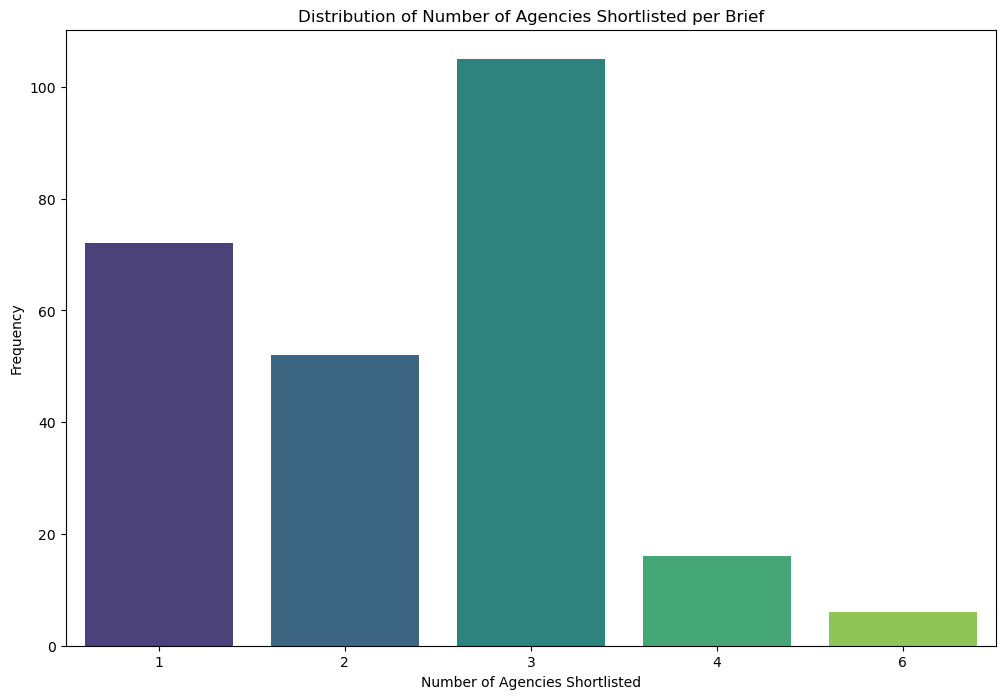

In [25]:
# Getting the count of how often each number of agencies was shortlisted
shortlisted_counts = df['Number of Agencies Shortlisted Brief'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=shortlisted_counts.index, y=shortlisted_counts.values, palette='viridis')
plt.title('Distribution of Number of Agencies Shortlisted per Brief')
plt.xlabel('Number of Agencies Shortlisted')
plt.ylabel('Frequency')
plt.show()


# Bivariate analysis

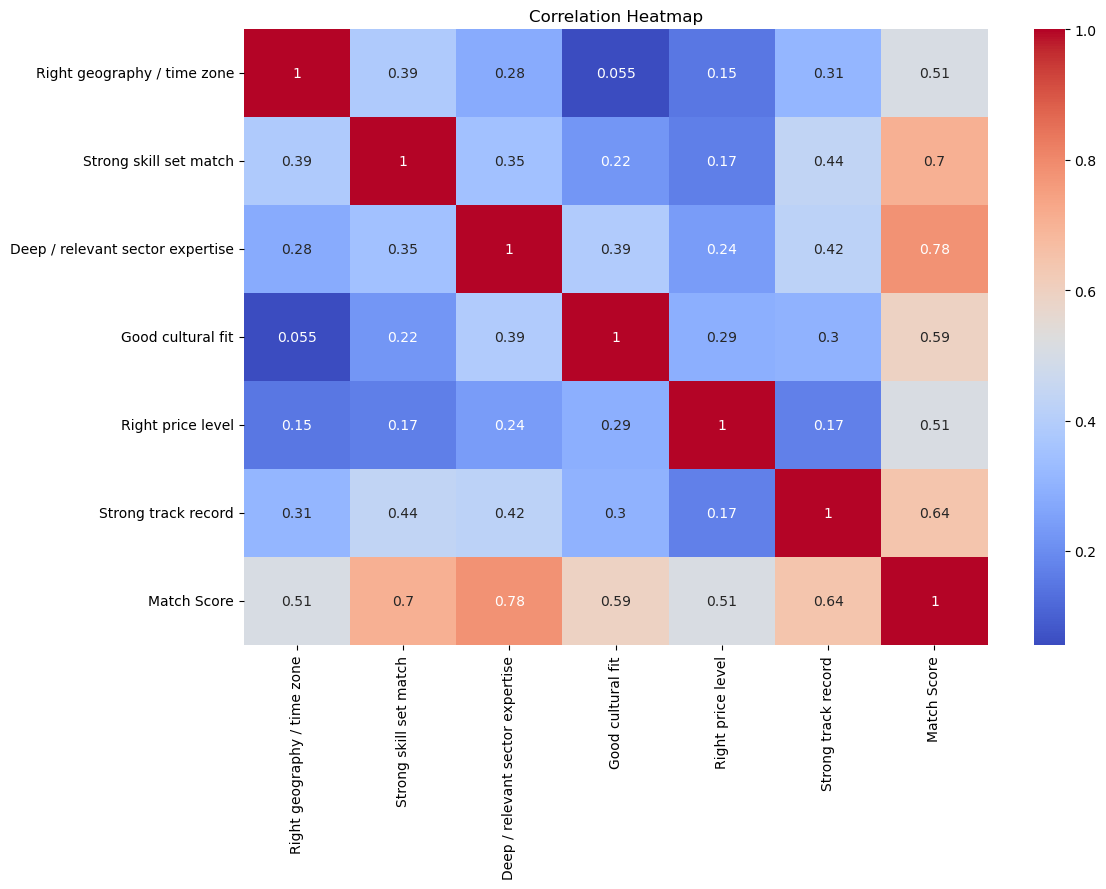

In [13]:
# Selecting numerical variables for correlation analysis
correlation_matrix = df[['Right geography / time zone', 'Strong skill set match',
                           'Deep / relevant sector expertise', 'Good cultural fit',
                           'Right price level', 'Strong track record', 'Match Score']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


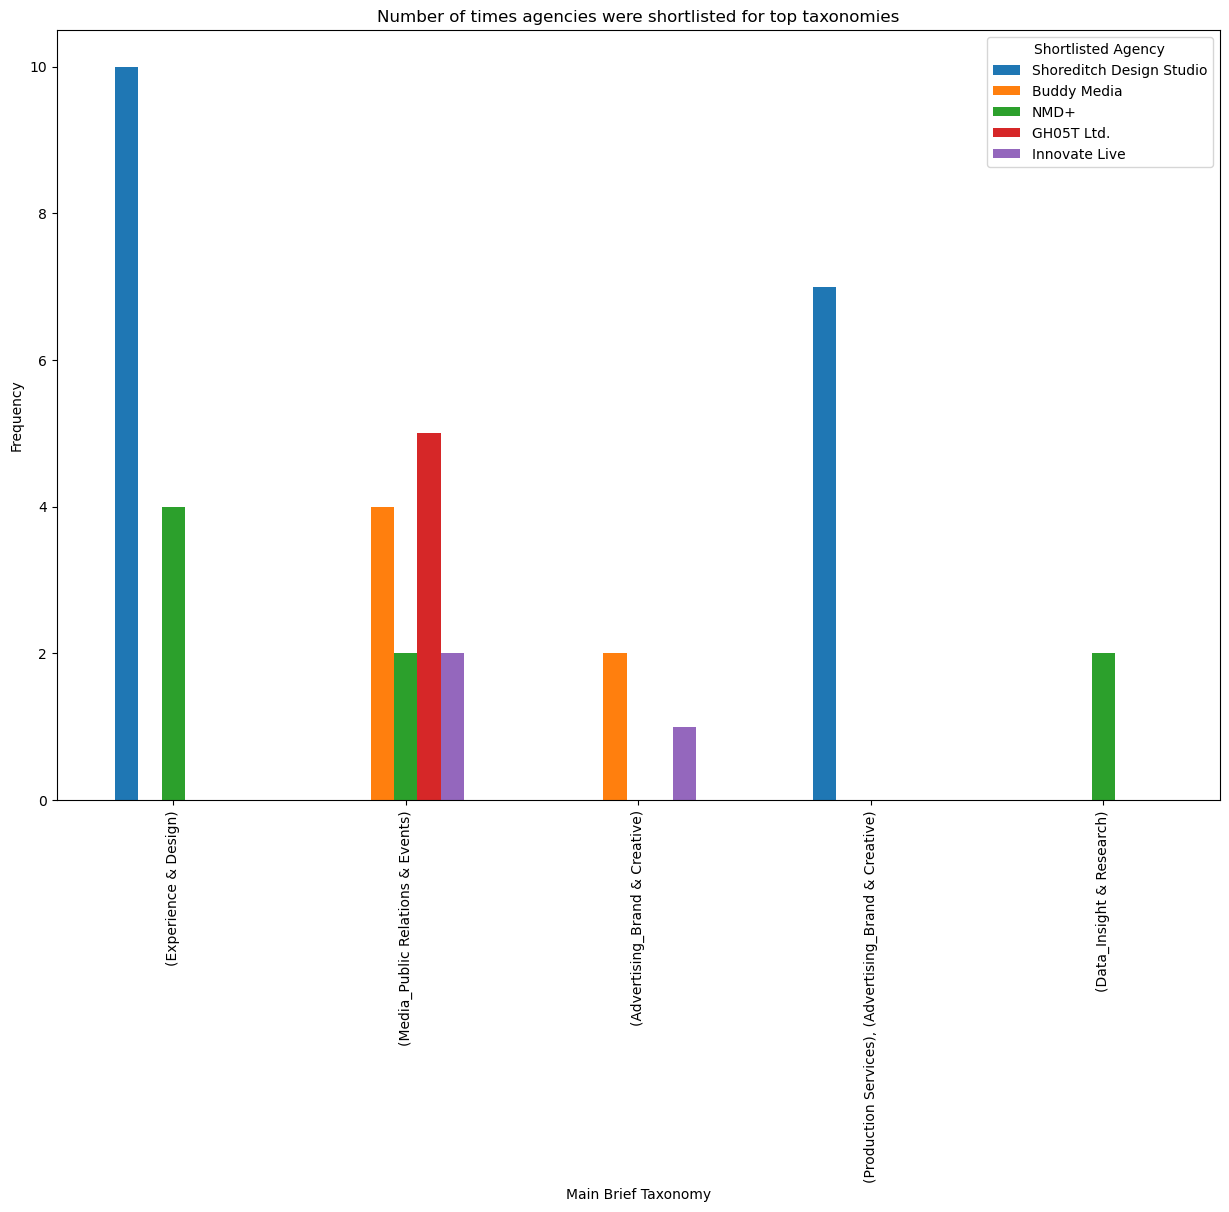

In [27]:
# Grouping data by taxonomy and getting the count of each agency
grouped_data = df.groupby('Main Brief Taxonomy')['Shortlisted Agency'].value_counts().unstack().fillna(0)

# Plotting top N taxonomies and agencies for clarity
N = 5  # for top 5, adjust as necessary
top_taxonomies = grouped_data.sum(axis=1).nlargest(N).index
top_agencies = grouped_data.sum(axis=0).nlargest(N).index

subset_data = grouped_data.loc[top_taxonomies, top_agencies]

# Plotting grouped bar chart
subset_data.plot(kind='bar', figsize=(15,10), stacked=False)
plt.title('Number of times agencies were shortlisted for top taxonomies')
plt.ylabel('Frequency')
plt.xlabel('Main Brief Taxonomy')
plt.show()


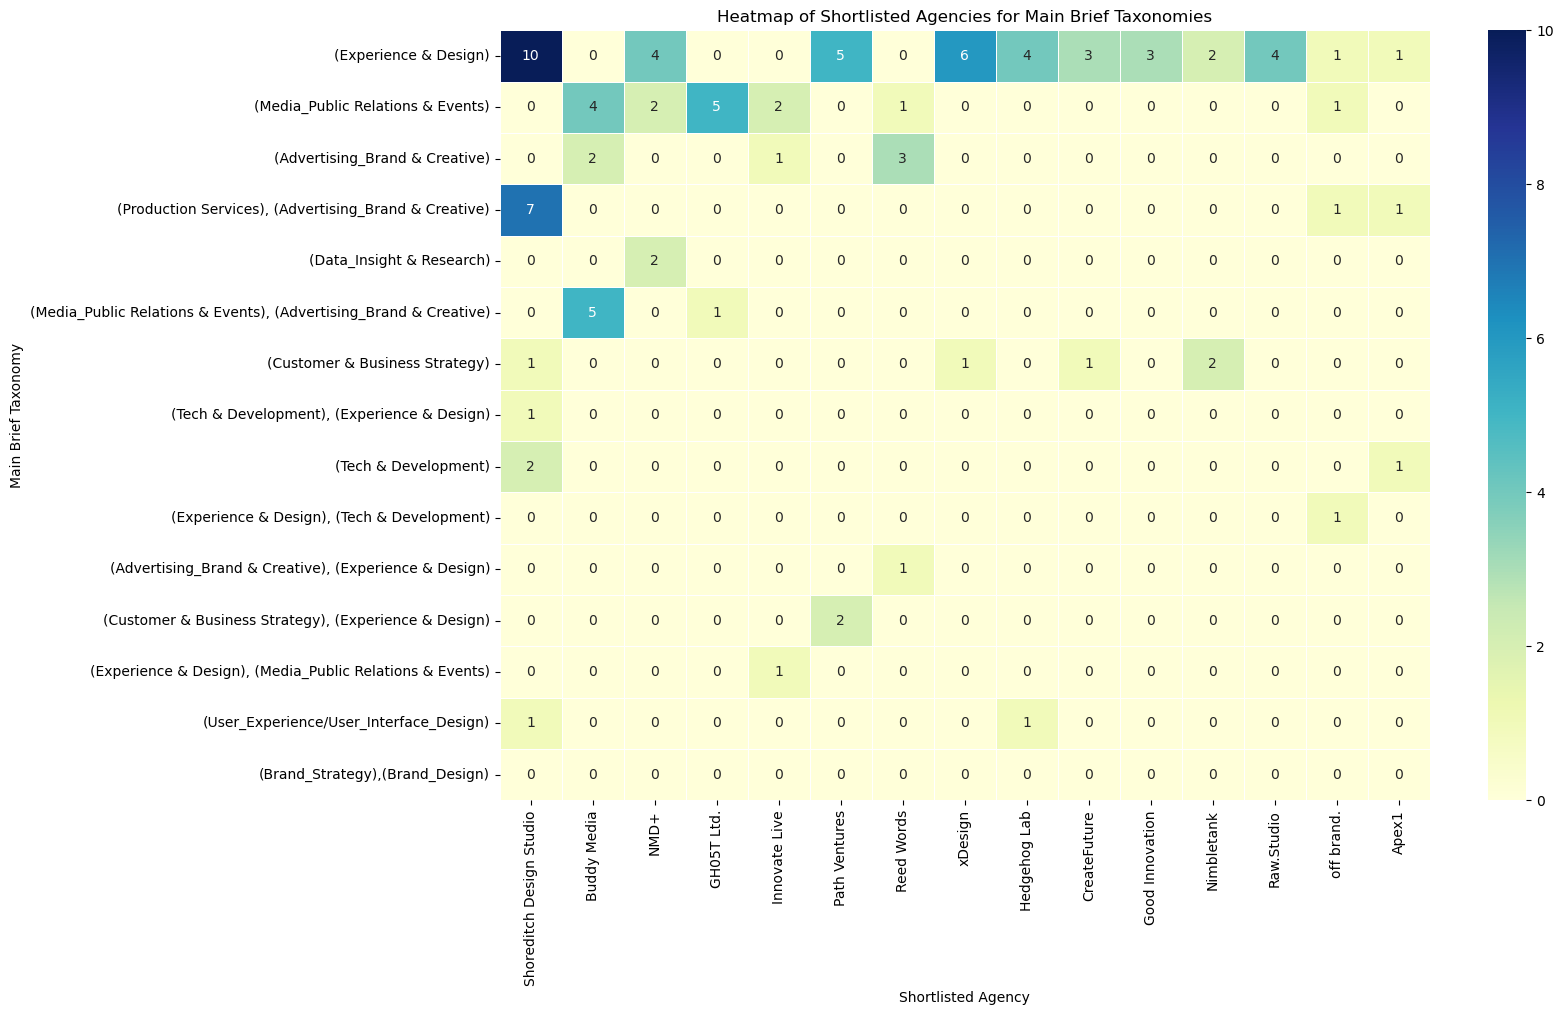

In [17]:
# Create pivot table
pivot_data = df.pivot_table(index='Main Brief Taxonomy', columns='Shortlisted Agency', 
                            values='Brief Name', aggfunc='count').fillna(0)

# considering only the top N agencies and taxonomies
N = 15 # For top 15
top_agencies = pivot_data.sum(axis=0).nlargest(N).index
top_taxonomies = pivot_data.sum(axis=1).nlargest(N).index

subset_pivot = pivot_data.loc[top_taxonomies, top_agencies]

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(subset_pivot, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Shortlisted Agencies for Main Brief Taxonomies')
plt.show()


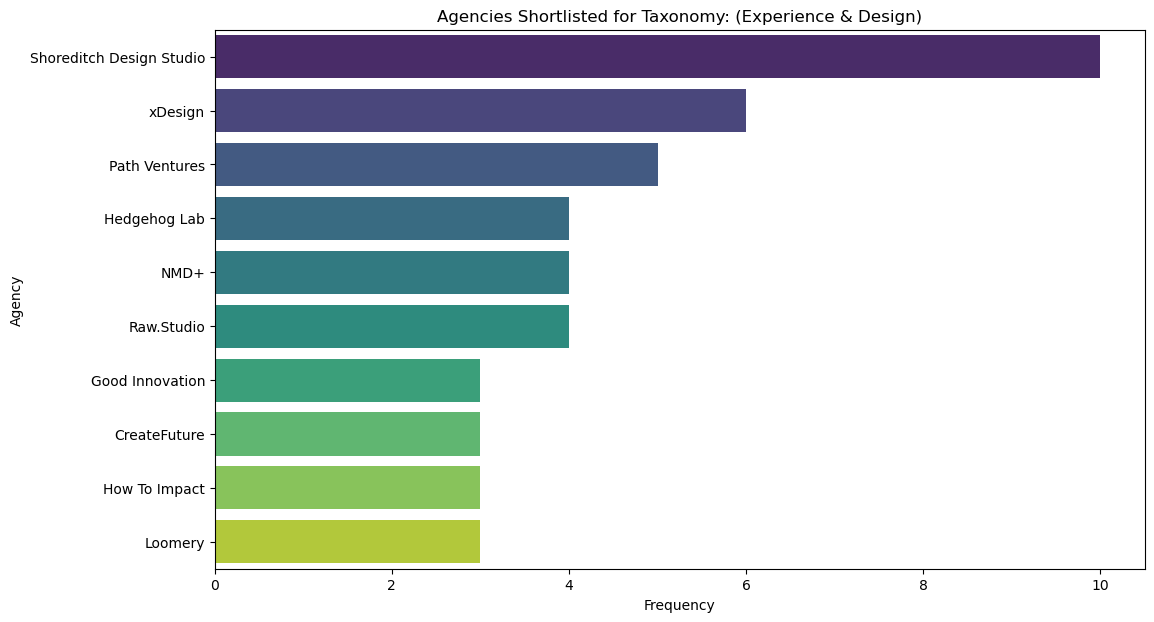

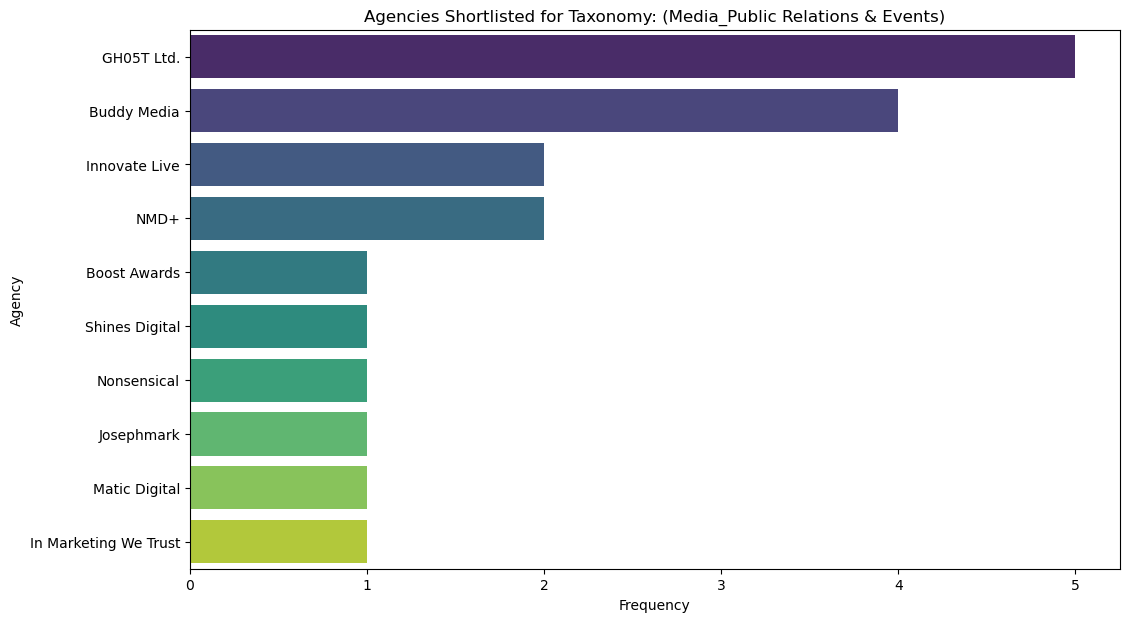

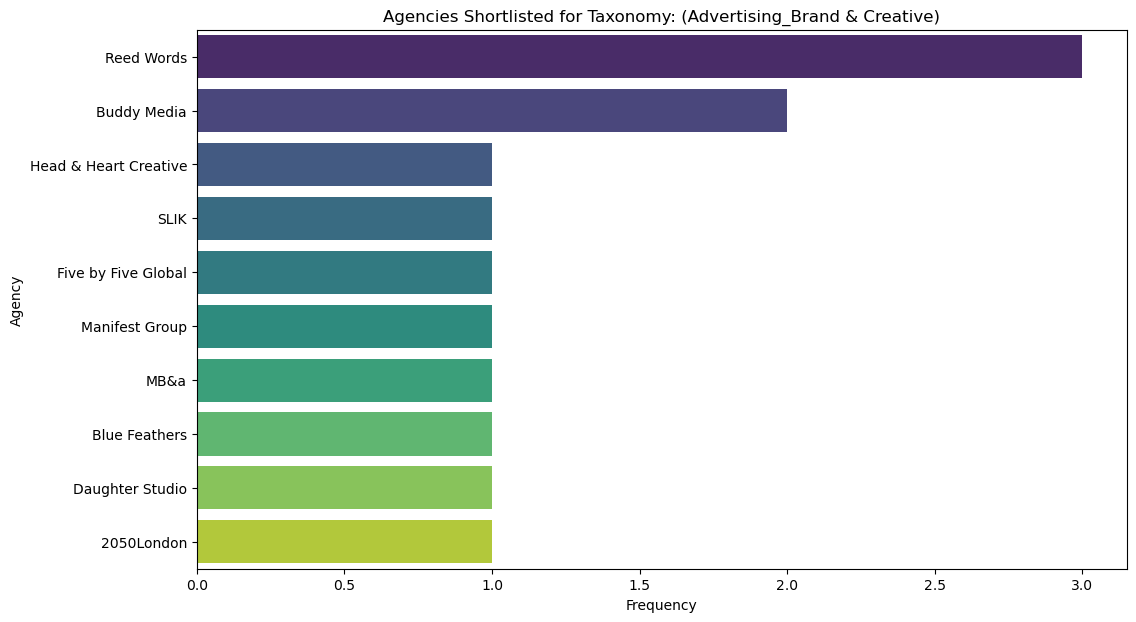

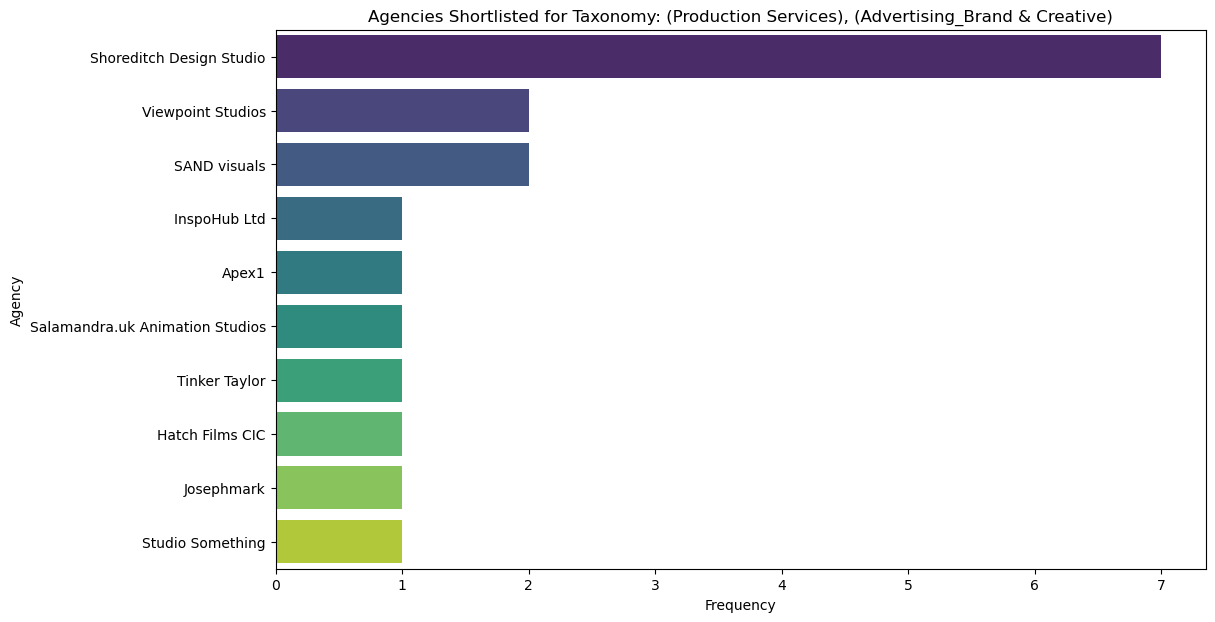

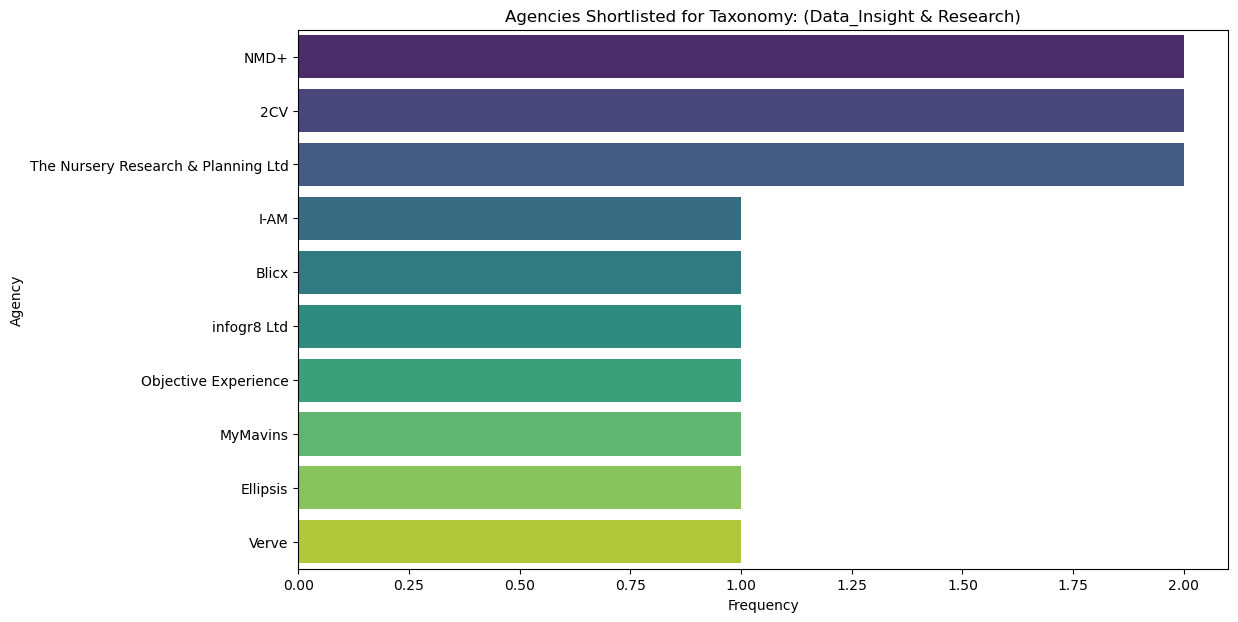

In [15]:
# Identify the top 5 taxonomies based on frequency
top_5_taxonomies = df['Main Brief Taxonomy'].value_counts().nlargest(5).index

# Plotting the frequently shortlisted agencies for each taxonomy
for taxonomy in top_5_taxonomies:
    plt.figure(figsize=(12, 7))
    agencies = df[df['Main Brief Taxonomy'] == taxonomy]['Shortlisted Agency'].value_counts()
    
    # Plotting the top 10 agencies for better visibility, can adjust as needed
    top_agencies = agencies.head(10)
    sns.barplot(x=top_agencies.values, y=top_agencies.index, palette='viridis')
    
    plt.title(f'Agencies Shortlisted for Taxonomy: {taxonomy}')
    plt.xlabel('Frequency')
    plt.ylabel('Agency')
    plt.show()
    